# Signal Processing (`scipy.signal`)

In [1]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt

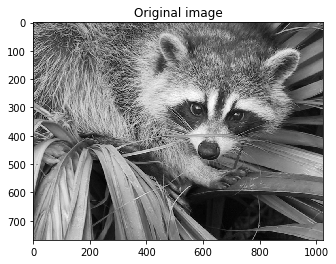

In [2]:
image = misc.face(gray=True).astype(np.float32)
derfilt = np.array([1.0, -2, 1.0], dtype=np.float32)
ck = signal.cspline2d(image, 8.0)
deriv = (signal.sepfir2d(ck, derfilt, [1]) +
         signal.sepfir2d(ck, [1], derfilt))

laplacian = np.array([[0,1,0], [1,-4,1], [0,1,0]], dtype=np.float32)
deriv2 = signal.convolve2d(ck,laplacian,mode='same',boundary='symm')

plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.show()

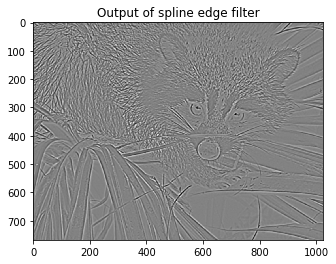

In [3]:
plt.figure()
plt.imshow(deriv)
plt.gray()
plt.title('Output of spline edge filter')
plt.show()

In [4]:
x = np.array([1.0, 2.0, 3.0])
h = np.array([0.0, 1.0, 0.0, 0.0, 0.0])
signal.convolve(x, h)

signal.convolve(x, h, 'same')

x = np.array([[1., 1., 0., 0.], [1., 1., 0., 0.], [0., 0., 0., 0.], [0., 0., 0., 0.]])
h = np.array([[1., 0., 0., 0.], [0., 0., 0., 0.], [0., 0., 1., 0.], [0., 0., 0., 0.]])
signal.convolve(x, h)

array([[1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

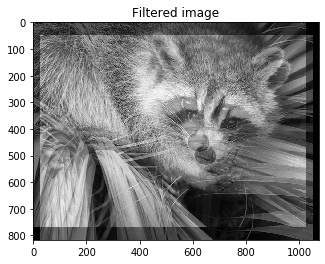

In [5]:
image = misc.face(gray=True)
w = np.zeros((50, 50))
w[0][0] = 1.0
w[49][25] = 1.0
image_new = signal.fftconvolve(image, w)

plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()

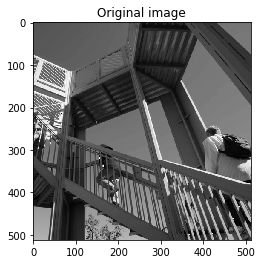

In [6]:
image = misc.ascent()
w = signal.gaussian(50, 10.0)
image_new = signal.sepfir2d(image, w, w)

plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.show()

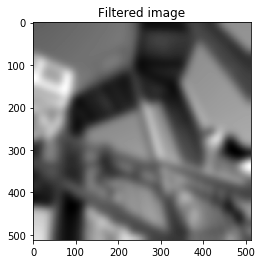

In [7]:
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()

In [8]:
x = np.array([1., 0., 0., 0.])
b = np.array([1.0/2, 1.0/4])
a = np.array([1.0, -1.0/3])
signal.lfilter(b, a, x)

zi = signal.lfiltic(b, a, y=[2.])
signal.lfilter(b, a, x, zi=zi)

b = np.array([1.0/2, 1.0/4])
a = np.array([1.0, -1.0/3])
signal.tf2zpk(b, a)

(array([-0.5]), array([0.33333333]), 0.5)

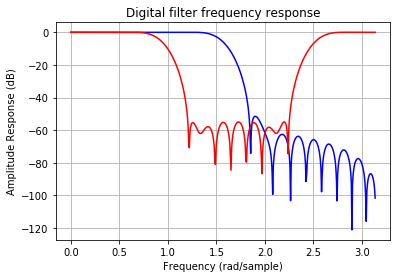

In [9]:
b1 = signal.firwin(40, 0.5)
b2 = signal.firwin(41, [0.3, 0.8])
w1, h1 = signal.freqz(b1)
w2, h2 = signal.freqz(b2)

plt.title('Digital filter frequency response')
plt.plot(w1, 20*np.log10(np.abs(h1)), 'b')
plt.plot(w2, 20*np.log10(np.abs(h2)), 'r')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

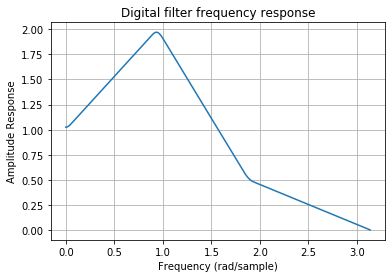

In [10]:
b = signal.firwin2(150, [0.0, 0.3, 0.6, 1.0], [1.0, 2.0, 0.5, 0.0])
w, h = signal.freqz(b)

plt.title('Digital filter frequency response')
plt.plot(w, np.abs(h))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

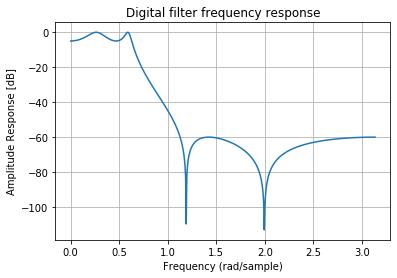

In [11]:
b, a = signal.iirfilter(4, Wn=0.2, rp=5, rs=60, btype='lowpass', ftype='ellip')
w, h = signal.freqz(b, a)

plt.title('Digital filter frequency response')
plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

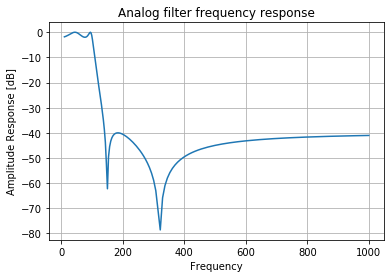

In [12]:
b, a = signal.iirdesign(wp=100, ws=200, gpass=2.0, gstop=40., analog=True)
w, h = signal.freqs(b, a)

plt.title('Analog filter frequency response')
plt.plot(w, 20*np.log10(np.abs(h)))
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency')
plt.grid()
plt.show()

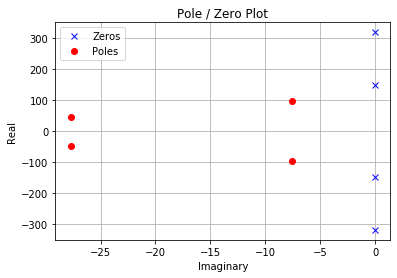

In [13]:
z, p, k = signal.tf2zpk(b, a)

plt.plot(np.real(z), np.imag(z), 'xb')
plt.plot(np.real(p), np.imag(p), 'or')
plt.legend(['Zeros', 'Poles'], loc=2)

plt.title('Pole / Zero Plot')
plt.ylabel('Real')
plt.xlabel('Imaginary')
plt.grid()
plt.show()

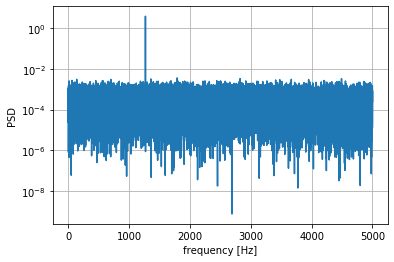

In [15]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1270.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

f, Pper_spec = signal.periodogram(x, fs, 'flattop', scaling='spectrum')
plt.semilogy(f, Pper_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

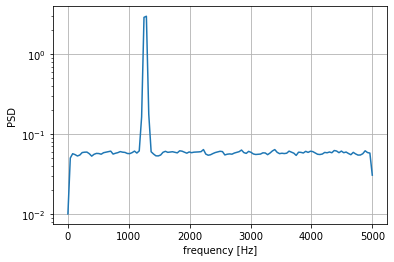

In [16]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1270.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
f, Pwelch_spec = signal.welch(x, fs, scaling='spectrum')
plt.semilogy(f, Pwelch_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

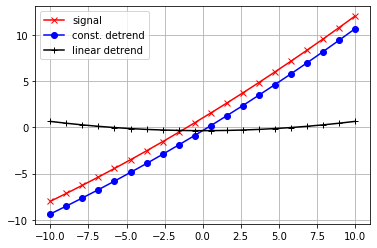

In [17]:
t = np.linspace(-10, 10, 20)
y = 1 + t + 0.01*t**2
yconst = signal.detrend(y, type='constant')
ylin = signal.detrend(y, type='linear')
plt.plot(t, y, '-rx')
plt.plot(t, yconst, '-bo')
plt.plot(t, ylin, '-k+')
plt.grid()
plt.legend(['signal', 'const. detrend', 'linear detrend'])
plt.show()